In [1]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y dataset')

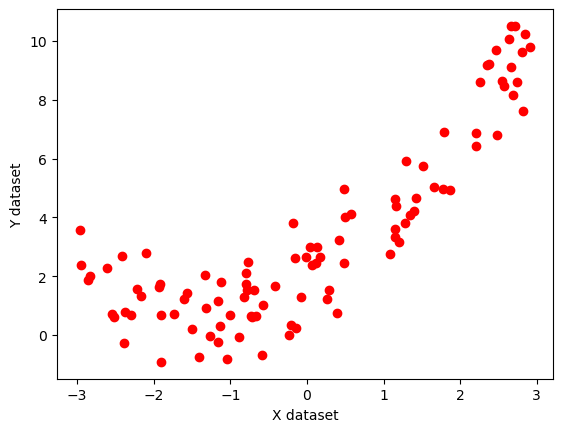

In [4]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 *X + 2 + np.random.randn(100,1)
## quadratic equation used - y = 0.5x^2 +1.5 x + 2 outliers
plt.scatter(X,y,color= 'red')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [7]:
## lets implement a simple linear regression
regression_1.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression_1.predict(X_test))
print(score)

0.5688385632671404


Text(0, 0.5, 'Y dataset')

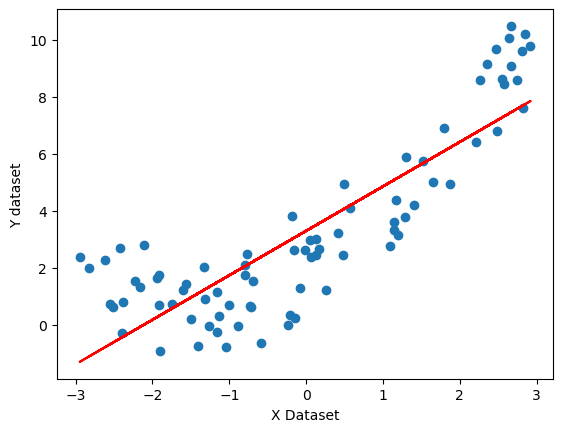

In [11]:
## lets visualize the model
plt.plot(X_train, regression_1.predict(X_train),color ='r')
plt.scatter(X_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y dataset")

In [13]:
## lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [14]:
X_train_poly

array([[ 1.00000000e+00,  1.14595539e+00,  1.31321376e+00],
       [ 1.00000000e+00, -2.22253708e+00,  4.93967106e+00],
       [ 1.00000000e+00, -1.32012179e+00,  1.74272154e+00],
       [ 1.00000000e+00, -1.03883291e+00,  1.07917382e+00],
       [ 1.00000000e+00, -1.51914083e-01,  2.30778888e-02],
       [ 1.00000000e+00,  1.65445020e-01,  2.73720545e-02],
       [ 1.00000000e+00,  2.48141594e+00,  6.15742507e+00],
       [ 1.00000000e+00,  2.46461717e+00,  6.07433779e+00],
       [ 1.00000000e+00,  4.60890732e-02,  2.12420267e-03],
       [ 1.00000000e+00,  4.86536854e-01,  2.36718111e-01],
       [ 1.00000000e+00, -1.40584337e+00,  1.97639558e+00],
       [ 1.00000000e+00,  1.29643620e+00,  1.68074681e+00],
       [ 1.00000000e+00,  2.73601230e+00,  7.48576328e+00],
       [ 1.00000000e+00,  5.97006029e-02,  3.56416198e-03],
       [ 1.00000000e+00,  5.68730058e-01,  3.23453879e-01],
       [ 1.00000000e+00, -2.94760862e+00,  8.68839656e+00],
       [ 1.00000000e+00, -1.93456277e+00

In [15]:
X_test_poly

array([[ 1.        , -2.96836321,  8.81118013],
       [ 1.        , -0.66731733,  0.44531242],
       [ 1.        ,  0.38581336,  0.14885195],
       [ 1.        , -2.30176695,  5.29813111],
       [ 1.        ,  2.71278954,  7.35922709],
       [ 1.        , -0.78432137,  0.61516001],
       [ 1.        , -0.56932305,  0.32412874],
       [ 1.        ,  0.28751411,  0.08266437],
       [ 1.        ,  2.21287985,  4.89683723],
       [ 1.        ,  2.69497199,  7.26287404],
       [ 1.        , -0.42253124,  0.17853265],
       [ 1.        , -2.86472798,  8.20666641],
       [ 1.        , -0.81808633,  0.66926525],
       [ 1.        ,  1.15537058,  1.33488119],
       [ 1.        ,  2.37800131,  5.65489022],
       [ 1.        ,  1.42413347,  2.02815614],
       [ 1.        , -1.11688961,  1.2474424 ],
       [ 1.        ,  1.78183817,  3.17494727],
       [ 1.        ,  1.33892316,  1.79271524],
       [ 1.        ,  0.49728246,  0.24728984]])

In [16]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train , y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

ValueError: X has 3 features, but LinearRegression is expecting 1 features as input.

In [17]:
print(regression.coef_)

[[1.56339981]]


In [18]:
print(regression.intercept_)

[3.29582969]


In [19]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

ValueError: X has 3 features, but LinearRegression is expecting 1 features as input.

## Pipelining Concepts


In [6]:
from sklearn.pipeline import Pipeline
import numpy as np

In [7]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    poly_features = PolynomialFeatures(degree = degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression= Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)
    ## plotting prediction line
    plt.plot(X_new , y_pred_new, 'r', label = "Degree" + str(degree), linewidth = 3 )
    plt.plot(X_train, y_train, 'b.', linewidth = 3)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])
    plt.show()

In [8]:
poly_regression(5)

NameError: name 'PolynomialFeatures' is not defined